<a href="https://colab.research.google.com/github/sakamototaisei/python_pf_colabo/blob/main/PF_mpl_finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **株価のローソク足データを取得する**

In [26]:
from pandas_datareader import data
import pandas as pd 
import numpy as np
 
# 株価データを取得
df = data.DataReader('7203.JP', 'stooq')
 
# 日付の古い順に並び替え
df.sort_index(inplace=True)

# 最新の50日分のデータを抽出
df = df.tail(50)

In [27]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-01-18,1861.0,1916.0,1846.0,1909.5,31290700
2023-01-19,1850.0,1871.0,1847.0,1864.5,21969700
2023-01-20,1851.0,1883.0,1851.0,1883.0,16703500
2023-01-23,1900.0,1904.0,1883.5,1889.0,14661600
2023-01-24,1913.0,1913.0,1899.5,1911.5,16261100


# **株価データをチャートでプロットする**

まずは株価データを単純にプロットしてみます。

これにはDataFrameのplot関数で対応可能です。

Volume列を避けるために、iloc関数で最初の4列だけを指定しています。

<Axes: xlabel='Date'>

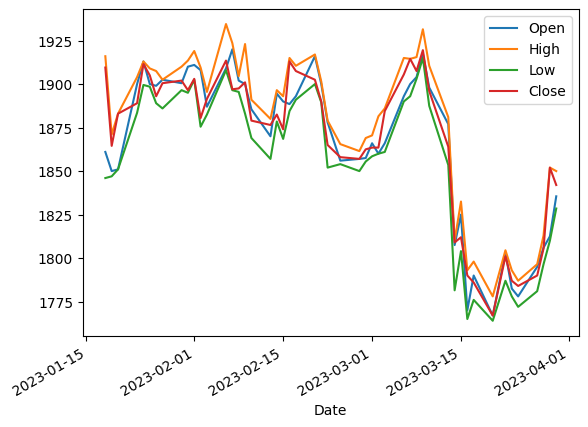

In [17]:
df.iloc[:, :4].plot()

# **mpl_financeでローソク足チャートを描く**

これはmatplotlibというチャート描画用ライブラリーの拡張ライブラリーみたいなもので、matplotlibの使い勝手を継承しながらfinance系のチャートをいい感じに描くことができるライブラリーです



In [8]:
pip install mpl_finance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **candlestick_ohlc関数でローソク足チャートが描ける**

mpl_financeにはcandlestick_ohlcという名前の通りの関数があります。

 

ohlcはOpen, High, Low, Closeの略で、データを指定する際にはこの順番で引き渡す必要があります。

さらにindexも必要になるので、引き渡すデータは5列（index, Open, High, Low, Close）になります。

さらにローソク足の幅や上昇時の色や下落時の色を指定することもできます。

わりとカスタマイズ性高いです。

## **（下準備）index列を追加する**

candlestick_ohlc関数を使うために、まずはindex列を追加します。

すでにこのDataFrameのindexがdatetimeになっているのでreset_indexを使えばいいのではないかと思われる方もいるかもしれません。

しかし、後述しますがcandlestick_ohlc関数で日付データを扱うには少し工夫が必要なために、ここでは一番簡単な0から数字を順番に並べたものをindex列に指定します。

ここではinsert関数を使って最初の行にindex列を挿入します。

In [28]:
df.insert(0, 'index', [i for i in range(len(df))])
df.head()

,index,Open,High,Low,Close,Volume
Date,,,,,,
2023-01-18,0,1861.0,1916.0,1846.0,1909.5,31290700
2023-01-19,1,1850.0,1871.0,1847.0,1864.5,21969700
2023-01-20,2,1851.0,1883.0,1851.0,1883.0,16703500
2023-01-23,3,1900.0,1904.0,1883.5,1889.0,14661600
2023-01-24,4,1913.0,1913.0,1899.5,1911.5,16261100


## **ローソク足チャートを描く**

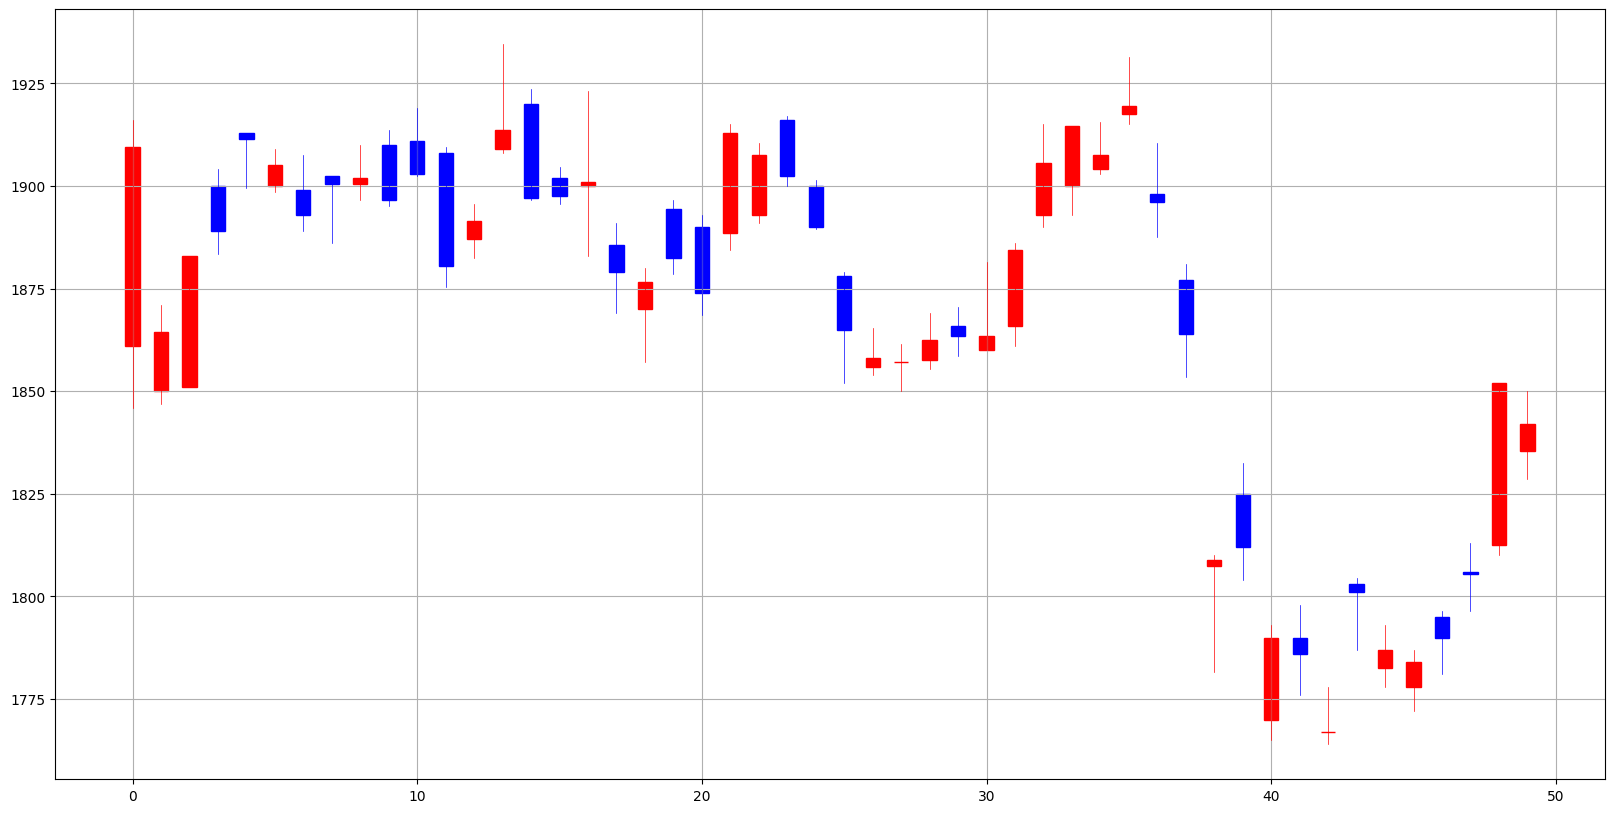

In [29]:
import mpl_finance
import matplotlib.pyplot as plt
%matplotlib inline
 
 
# チャート定義
fig, ax = plt.subplots(figsize=(20, 10))
 
# ローソク足チャートをプロット
mpl_finance.candlestick_ohlc(ax, df.values, width=0.5, colorup='r', colordown='b')
 
# グリッド表示
plt.grid()
 
# ローソク足チャートを表示
plt.show()

ここでは1つだけ、df.valuesについて触れておこうかと思います。

valuesを使うとDataFrameをnumpyのarray型に変換することができます。

 

これはcandlestick_ohlcの仕様で、この形式で引き渡さないとローソク足チャートを描くことができません。

df.valuesがどんなことをしているのかはこちらの例をみていただくとイメージがわくと思います。

In [13]:
df2 = pd.DataFrame([['A', 'B', 'C'], ['D', 'E', 'F'], ['G', 'H', 'I']])
df2

,0,1,2
0,A,B,C
1,D,E,F
2,G,H,I


In [14]:
df2.values

array([['A', 'B', 'C'],
       ['D', 'E', 'F'],
       ['G', 'H', 'I']], dtype=object)

配列の中に複数の配列が含まれ、それぞれがDataFrameの1行を示します。

このarray型に変換してcandlestick_ohlc関数に引き渡すと、ローソク足が描けるようになります。

 

ちなみにその他の引数であるwidthはローソク足の幅、colorupは上昇時の色でここでは赤、colordownは下落時の色でここでは緑を指定しています。

そしてcandlestick_ohlcでは引き渡されたデータを1列目から順番に、index, open, high, low, closeとして読み取るので、ここの順番さえ合っていれば、それ以降にVolumeとかの関係ない列があっても問題ありません。

## **チャートのx軸を日付データにする**

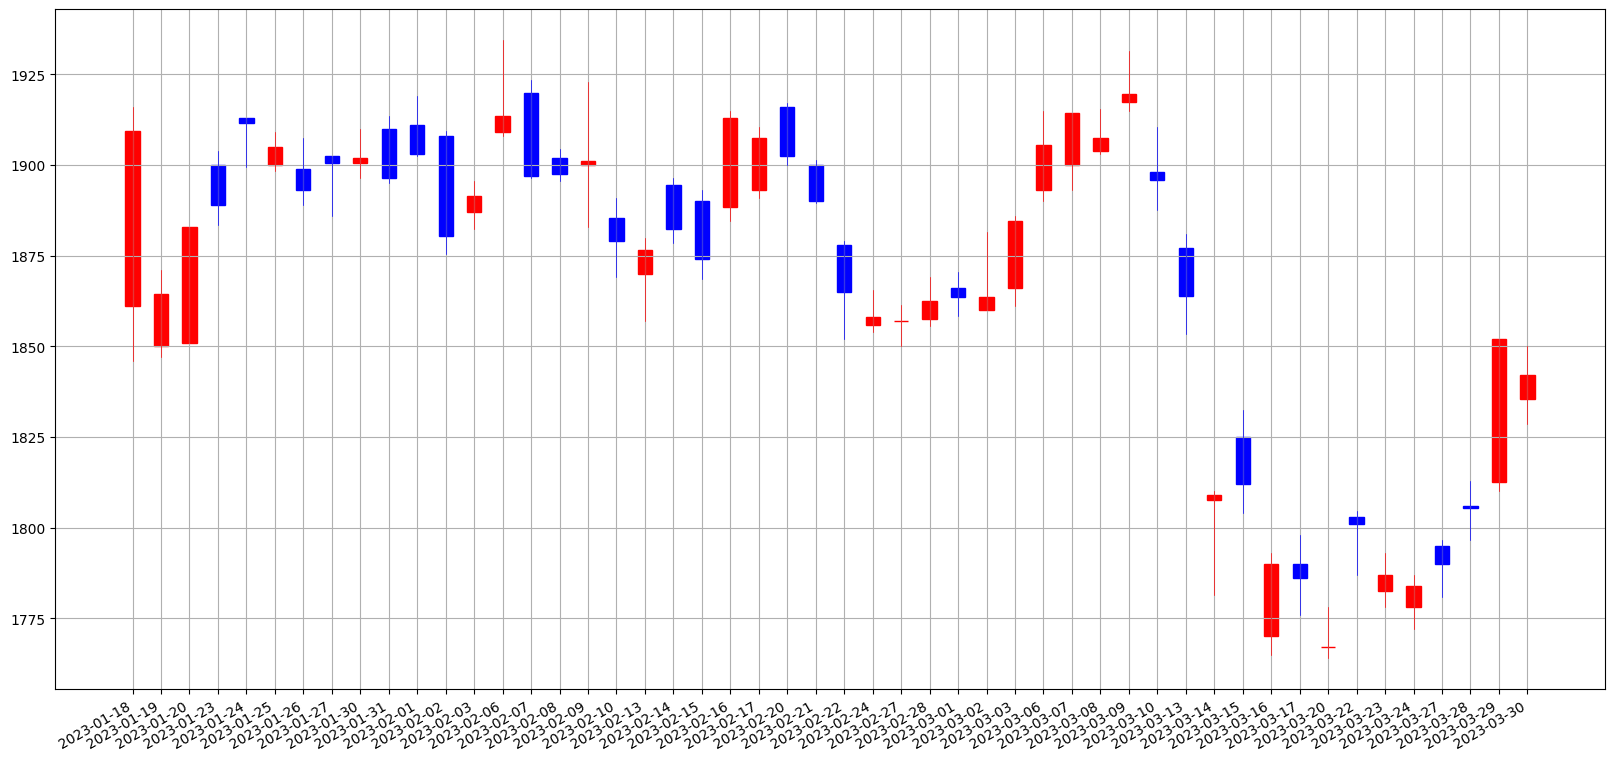

In [30]:
import mpl_finance
import matplotlib.pyplot as plt
%matplotlib inline
 
 
# チャート定義
fig, ax = plt.subplots(figsize=(20, 10))
 
# ローソク足チャートをプロット
mpl_finance.candlestick_ohlc(ax, df.values, width=0.5, colorup='r', colordown='b')
 
# X軸を日付データで表示させる
plt.xticks([x for x in range(len(df))], [x.strftime('%Y-%m-%d') for x in df.index])
fig.autofmt_xdate()
 
# グリッド表示
plt.grid()
 
# ローソク足チャートを表示
plt.show()

**xticks**では、引数として2つのリストを渡しています。

1つ目のリストにある各要素が2つ目のリストの値に対応して、ローソク足チャートに表示されるようになります。

リスト内表記を使うとコードがスッキリしますね。


そしてこのままだとx軸に日付データが横並びで書かれてしまうのでカオスになります。

そこで**autofmt_xdate関数**の登場です。

名前の通り、いい感じに表示データを調整してくれます。

